In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [23]:
# df = pd.read_csv("classification_nonlinear_xor.csv")
# df.loc[ df["y"] == -1, "y"] = 0 
# df.head()

df = pd.read_csv("classification_circle.csv")
df.loc[ df["y"] == -1, "y"] = 0 
df.head()

x1        x2  y
0  0.385697  1.235308  1
1  0.528159 -1.781597  1
2  0.935817 -1.414600  1
3  0.232862  0.822633  1
4  0.190594 -1.656273  1

In [24]:
feature_cols = ['x1', 'x2']
X = df[feature_cols].to_numpy()
y = df['y'].to_numpy()

In [25]:
%matplotlib notebook
%matplotlib notebook

def animate(i, *fargs):
    clf, X, y, df, xx, yy = fargs
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.cla()
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.Paired
    )
    contours = plt.contour(xx, yy, Z, linewidths=2, colors="white")
    sns.scatterplot(x="x1", y="x2", hue="y", data=df)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.legend(loc='lower right')


<IPython.core.display.Javascript object>


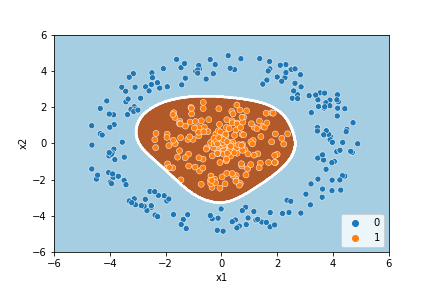

In [28]:
clf = MLPClassifier(activation="tanh", solver='adam', alpha=0.03, hidden_layer_sizes=(8, 4),
                    random_state=42, max_iter=2, warm_start=True)
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
anim = FuncAnimation(plt.gcf(), func=animate, fargs=(clf, X, y, df, xx, yy), interval=100, frames=200)
plt.show()